Question o1

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread ('images/sigiriya.jpg' ,cv.IMREAD_REDUCED_GRAYSCALE_4 )
assert im is not None

kernel = np.ones(( 3,3 ), np.float32)/9.
result = cv.filter2D(im, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

AssertionError: 

Question 02

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread ('images/einstein.jpg' ,cv.IMREAD_REDUCED_GRAYSCALE_4 )
assert im is not None
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
result = cv.filter2D(im, -1, sobel_v)
result = cv.normalize(result, result, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_32F)


fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

AssertionError: 

Question 06
part a,

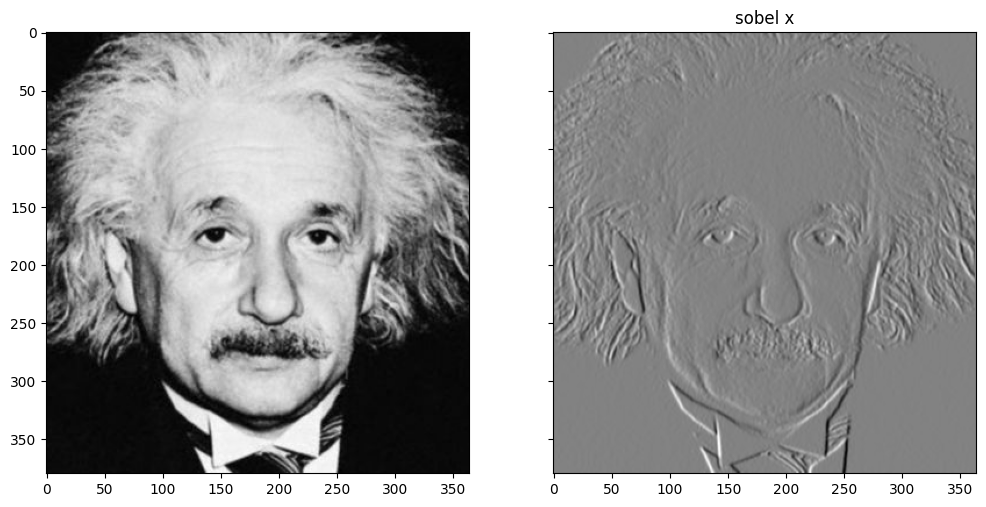

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread ('images/einstein.png' ,cv.IMREAD_GRAYSCALE)
assert im is not None

image_float = cv.normalize(im.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
grad_x = cv.Sobel(image_float, -1, 1, 0, ksize =3)
fig, axes = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize = (12, 12))

axes[0].imshow(im, cmap='gray')
axes[1].imshow(grad_x, cmap='gray')
axes[1].set_title( 'sobel x')
plt.show()